We are working on the us-accident-analysis dataset. In this dataset, we explore data and analyse data
for our EDA Porject.
This data is the accident report from different cities of different states of ``united state``.

In this notebook we are working on us-accident-annalysis dataset.
we are going to the following steps:
 - Load Dataset
 - use only 40% dataset
 - analyse dataset
 - get important insights from the data

# Load Data

In [1]:
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/us-accidents/US_Accidents_March23.csv


In [3]:
import random

def skiprow(row_index):
    if row_index==0:
        return False
    return random.random()>0.40
random.seed(42)

df = pd.read_csv('../input/us-accidents/US_Accidents_March23.csv',skiprows = skiprow)

In [4]:
df.head(5)

ID   Source  Severity           Start_Time             End_Time  \
0   A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
1   A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
2   A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
3   A-8  Source2         3  2016-02-08 07:59:58  2016-02-08 08:29:58   
4  A-10  Source2         3  2016-02-08 08:10:04  2016-02-08 08:40:04   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
1  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
2  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
3  39.770382 -84.194901      NaN      NaN          0.01  ...      False   
4  40.100590 -82.925194      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False           True        False          Night   
2   False  False           False          False        False          Night   
3   False  False           False          False        False            Day   
4   False  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                   Day  
1          Night               Day                   Day  
2            Day               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092921 entries, 0 to 3092920
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

### Insights

 - This is 40% sample data.
 - There are 46 columns and 3091738 rows `4 million`.
 - Some are object type and some are int and float and some are bolean.

## Missing Values

In [6]:
missing_data = df.isna().sum()

In [7]:
missed_data = (missing_data[missing_data > 0]/len(df))*100

In [8]:
import matplotlib.pyplot as plt

<Axes: >

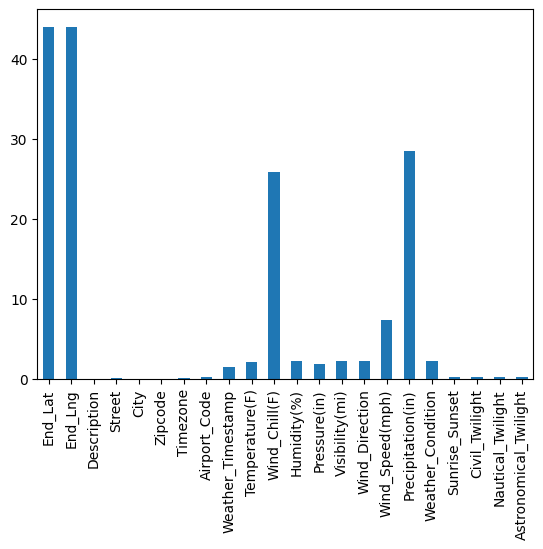

In [9]:
missed_data.plot(kind = 'bar')

In [10]:
import plotly.express as px

In [11]:
missed_data

End_Lat                  44.013151
End_Lng                  44.013151
Description               0.000032
Street                    0.141484
City                      0.003233
Zipcode                   0.024508
Timezone                  0.101328
Airport_Code              0.293832
Weather_Timestamp         1.550444
Temperature(F)            2.118256
Wind_Chill(F)            25.870496
Humidity(%)               2.253727
Pressure(in)              1.817538
Visibility(mi)            2.283085
Wind_Direction            2.261487
Wind_Speed(mph)           7.387256
Precipitation(in)        28.515665
Weather_Condition         2.239501
Sunrise_Sunset            0.302142
Civil_Twilight            0.302142
Nautical_Twilight         0.302142
Astronomical_Twilight     0.302142
dtype: float64

In [12]:
missed_data.sort_values(ascending = False)

End_Lat                  44.013151
End_Lng                  44.013151
Precipitation(in)        28.515665
Wind_Chill(F)            25.870496
Wind_Speed(mph)           7.387256
Visibility(mi)            2.283085
Wind_Direction            2.261487
Humidity(%)               2.253727
Weather_Condition         2.239501
Temperature(F)            2.118256
Pressure(in)              1.817538
Weather_Timestamp         1.550444
Sunrise_Sunset            0.302142
Civil_Twilight            0.302142
Nautical_Twilight         0.302142
Astronomical_Twilight     0.302142
Airport_Code              0.293832
Street                    0.141484
Timezone                  0.101328
Zipcode                   0.024508
City                      0.003233
Description               0.000032
dtype: float64

### Insights
Some columns have missing values.
 - most missing values is from End_Lat and End_Lng columns.
 - and most of the columns have not missing values.
 - End_Lat and End_Lng has 44% missing values of the data
 - Precipitation(in) and Wind_Chill(F) is over 25% missing values.
 - City is the most less missing values which is 0.003%.

### Check columns

In [13]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Insight
'ID' is unique value which is not important for the data.
'End_Lat' and 'End_Lng' has most of the missing data which is not important for the data.


In [14]:
import numpy as np

In [15]:
categorical_data = df.select_dtypes("object").columns.tolist()
numerical_data = df.select_dtypes(include = np.number).columns.tolist()

In [16]:
categorical_data

['ID',
 'Source',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

### Insights
There are some mixed data in the categorical_data like
 - ID,
 - End_Time
 - Start_Time
 - Airport_Code
 - Weather_Timestamp
 - Zipcode

In [17]:
numerical_data

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

There are some float type numerical columns also in the numeric_data.

# Exploratory Data Analysis

- we explore all the columns and visualize all columns by plotting and make important insights for our data
- Severity is our ``target column`` and we interect all other columns with Severity.
- We explore how many accident in the state in the city in which hour month and year and we other columns also.

## Severity

In [18]:
df.Source.value_counts()

Source
Source1    1731629
Source2    1322336
Source3      38956
Name: count, dtype: int64

In [19]:
df.Severity.value_counts()

Severity
2    2464141
3     519979
4      81904
1      26897
Name: count, dtype: int64

In [20]:
(df.Severity.value_counts()/len(df)) * 100

Severity
2    79.670350
3    16.811907
4     2.648112
1     0.869631
Name: count, dtype: float64

In [21]:
import seaborn as sns

- Severity 1 mean less impact on the traffic and 4 mean lot of the imfact with the trafic.

In [22]:
fig = px.histogram(df,x = 'Severity')
fig.show()

### Insights

 - Severity 2 has about 2464141 values in the data which is 80%. (which give insight that traffic is not longer delay or accident in not demage the person.)
 - Severity1 is most less values of 26897 which is 0.8% of the data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Source', ylabel='Count'>

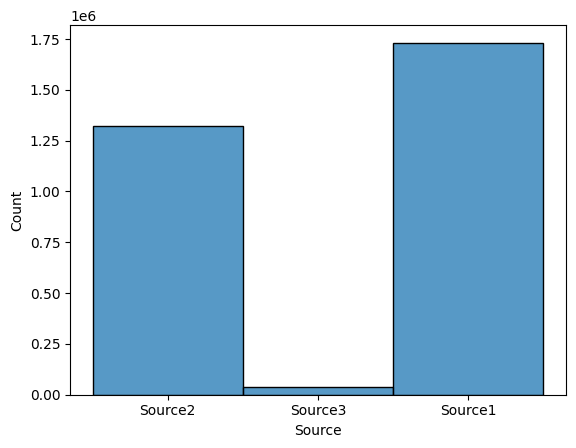

In [23]:
sns.histplot(data = df,x = 'Source')

 Source1 has most values in the datafram which is 1731629 value counts which is 55% of the data

## Start_Time

In [24]:
df.Start_Time.min(), df.Start_Time.max()

('2016-01-14 20:18:33', '2023-03-31 23:25:30')

### Insights

 - this give insight that traffic accident machine occured on 2016.
 - the first accident were report on 2016 on the january month.
 - data is given from 2016 

In [25]:
df['Year'] = pd.to_datetime(df.Start_Time,format = "mixed").dt.year

In [26]:
df['Month'] = pd.to_datetime(df.Start_Time,format = "mixed").dt.month

In [27]:
df['Week'] = pd.to_datetime(df.Start_Time,format = "mixed").dt.dayofweek

In [28]:
df['Hour'] = pd.to_datetime(df.Start_Time,format = "mixed").dt.hour

In [29]:
df['Minute'] = pd.to_datetime(df.Start_Time,format = "mixed").dt.minute

In [30]:
df['Year'].value_counts()

Year
2022    704618
2021    626016
2020    472445
2019    381989
2018    357870
2017    287033
2016    164232
2023     98718
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



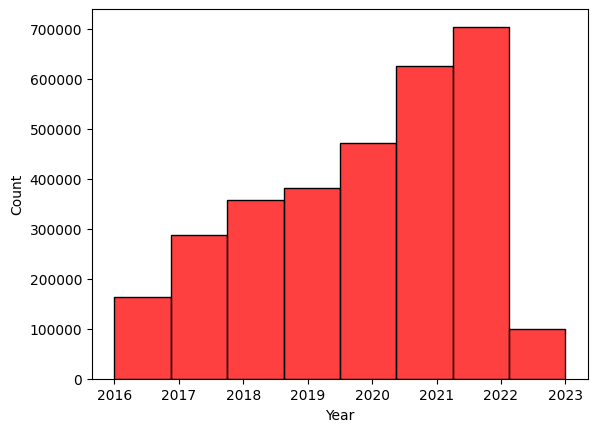

In [31]:
sns.histplot(df.Year,bins = 8,color = 'red')
plt.show()

### Insights

 - Most of the accident occured in the 2022 which is 704618(22.7%) of the total data(1930 accident per day).
 - less accident are occured in the 2023 because accident report is only march of the 2023.
 - In 2022 the most accident occure the technology become advance every accident maybe reported. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



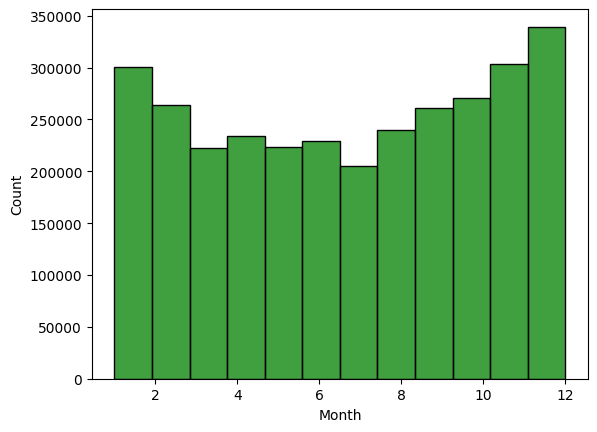

In [32]:
sns.histplot(df.Month,bins = 12,color = 'green')
plt.show()

### Insights

 - In ``Jan`` and ``Dec`` most accident are reported(I think it is the winter season and accident maybe occured due to fog or snow.)
 - Less are occured in the July. Which is summer season.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



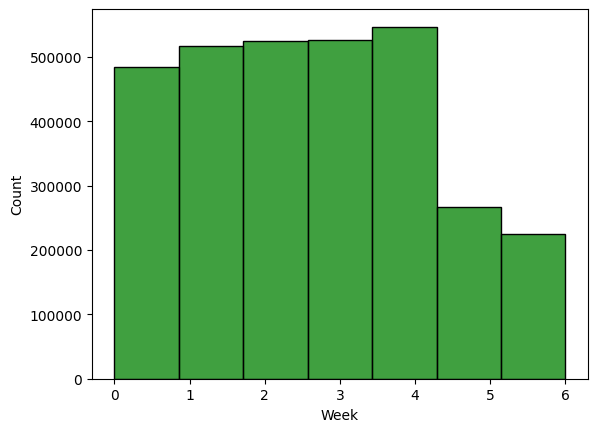

In [33]:
sns.histplot(df.Week,bins = 7,color = 'green')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



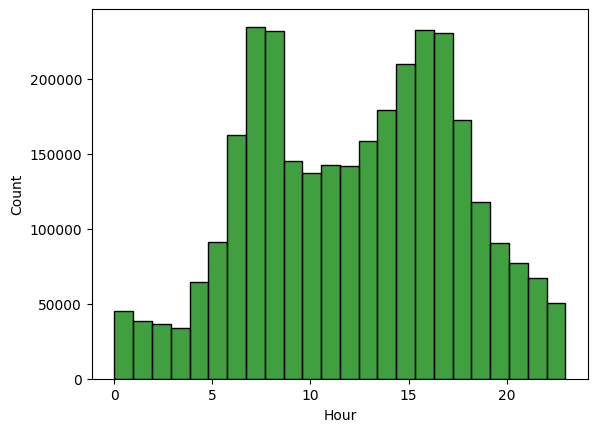

In [34]:
sns.histplot(df.Hour,bins = 24,color = 'green')
plt.show()

### Insights

 - More accident occured in the range of 7 to 9am beacause this is office or school open time.
 - And then range that accident are most occured are 4 to 6pm that is the office or school end time.

In [35]:
px.histogram(df,x = df[df['Year'] == 2016].Month)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



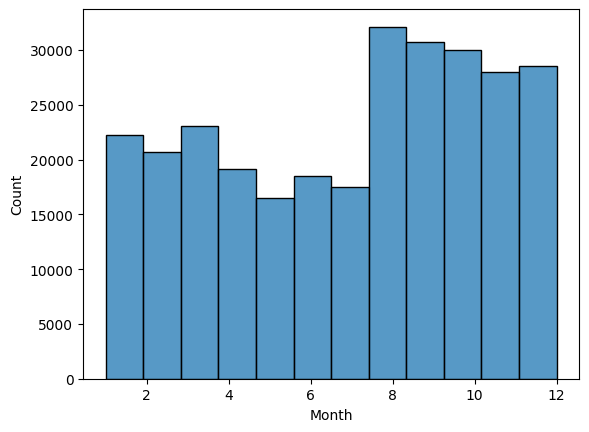

In [36]:
sns.histplot(df,x = df[df['Year'] == 2017].Month,bins = 12)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Month', ylabel='Count'>

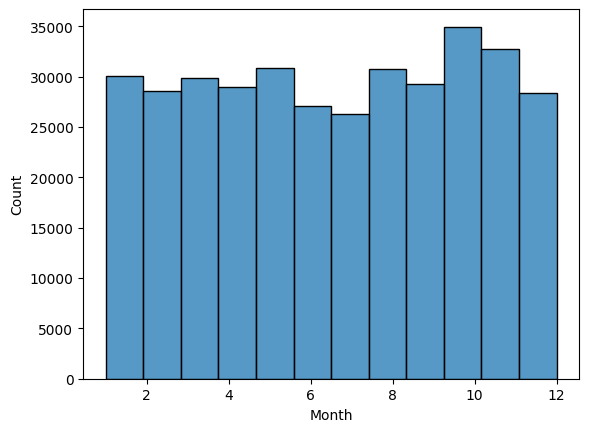

In [37]:
sns.histplot(data = df,x = df[df['Year'] == 2018].Month,bins = 12)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Month', ylabel='Count'>

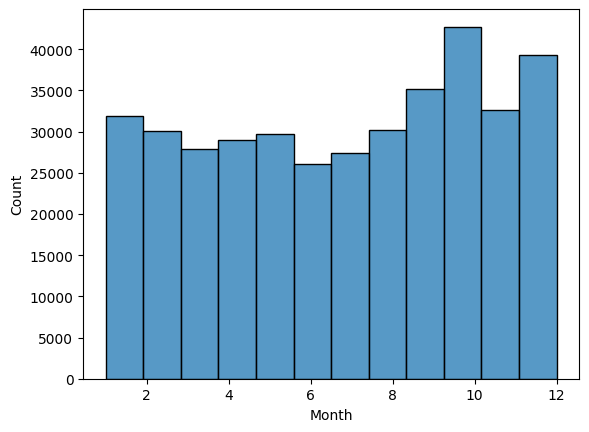

In [38]:
sns.histplot(data =
             df,x = df[df['Year'] == 2019].Month,bins = 12)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Month', ylabel='Count'>

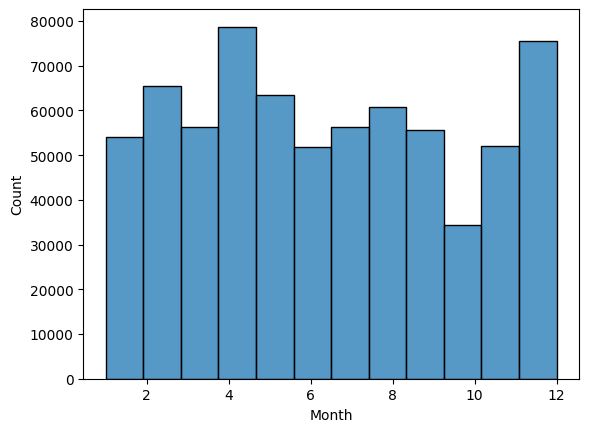

In [39]:
sns.histplot(data = df,x = df[df['Year'] == 2022].Month,bins = 12)

### Insights

- There is change in the trend of accident year by year.
- In 2016 Most of the data is missing beacuse the technology of accident survay is not improved well.
- 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Hour', ylabel='Count'>

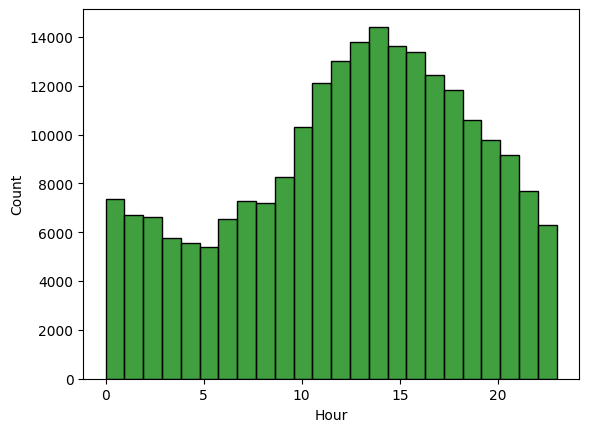

In [40]:
sns.histplot(df,x = df[df['Week'] == 6].Hour,bins = 24,color = 'green')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Hour', ylabel='Count'>

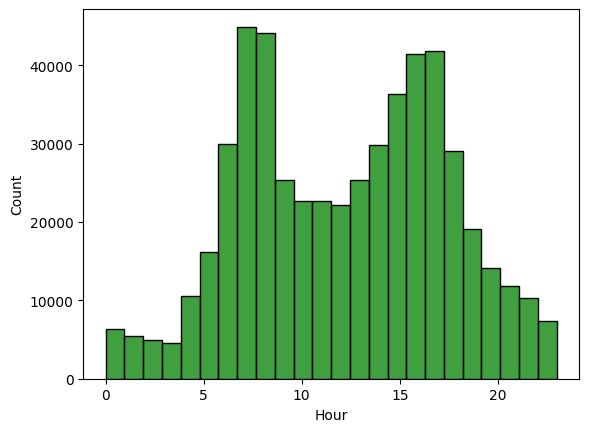

In [41]:
sns.histplot(df,x = df[df['Week'] == 3].Hour,bins = 24,color = 'green')

### Insights

 - In the weekend day accident is well distributed beacuse People are not going to the office or school.
 - In the busy day,the accident have range 7 to 9am and 4pm to 5pm.

In [42]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Week', 'Hour', 'Minute'],
      dtype='object')

## End_Time

In [43]:
df.End_Time = pd.to_datetime(df.End_Time,format = 'mixed')

In [44]:
df.End_Time[0]

Timestamp('2016-02-08 06:37:59')

### Insights

 - End_Time is the same distribution of accident as Start_Time.

## City

 - We Explore the City columns in dataset.
 - Which city has more number of accident.
 - which cities has less accident
 - Which 10 cities has more accident.

In [45]:
df.City.head()

0    Reynoldsburg
1    Williamsburg
2          Dayton
3          Dayton
4     Westerville
Name: City, dtype: object

In [46]:
df.City.nunique()

12580

### Insights

There are 12580 cities which accident reports.

In [47]:
cities_accident = df['City'].value_counts()

### Insights

 - Miami city has most number of accident which is 74886 which is 2.4% of the data
 - Houstan city has second most accidental City which reports 68059 accidents in the past 7 years.
 - 19% accident reports are occured in the 15 cities (as per data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Hour', ylabel='Count'>

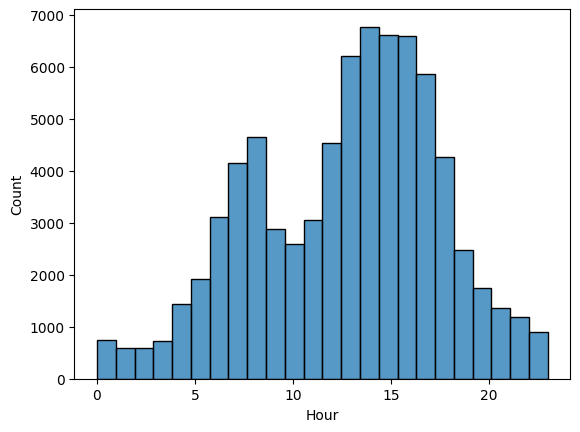

In [48]:
sns.histplot(data = df,x = df[df.City == 'Miami'].Hour,bins = 24)

In [49]:
high_accident_cities = cities_accident[cities_accident > 1000]

In [50]:
low_accident_cities = cities_accident[cities_accident < 100]

In [51]:
low_accident_cities

City
Ruffin            99
Brook Park        99
Las Cruces        99
Platte City       99
Keithville        99
                  ..
Crystal            1
Florala            1
Bivalve            1
South Sterling     1
Lachine            1
Name: count, Length: 9517, dtype: int64

### Insights

 - there are 85(0.67%) cities which is above 5000 accidents out of 12580 cities.
 - there are 532(4.22%) cities which is above 1000 accidents out of 12800 cities.
 - there are 12067(96%) cities which is less than  1000 accidents out of 12800 cities.
 - there are 9517(75.6%) cities which is less than 100 accidents out of 12580 cities.
 - there are 1440(11.4%) cities which is only 1 accident record in the past 8 years.

## State

In [52]:
df.State.value_counts()[:10]

State
CA    698132
FL    351944
TX    233474
SC    152641
NY    139284
NC    135200
VA    121740
PA    118411
MN     77164
OR     71867
Name: count, dtype: int64

In [53]:
df.State.nunique()

49

In [54]:
df.State.value_counts().tail(5)

State
WY    1511
ND    1416
ME    1076
VT     370
SD     115
Name: count, dtype: int64

In [55]:
state_accident = df.State.value_counts()

In [56]:
state_accident[state_accident < 10000]

State
AR    9004
NV    8604
KS    8381
DC    7411
RI    6909
MS    6029
DE    5726
WV    5492
ID    4471
NH    4113
NM    4102
WY    1511
ND    1416
ME    1076
VT     370
SD     115
Name: count, dtype: int64

### Insights

 - There are 49 state of data record for us-accident report.
 - California has the most number of accident which is 698132 which is 22.5% of the total data.
 - Florida is the second most accident reports record which is 351944 which is 11% of the data.
 - 63% accidents data record from only 8 states of the usa out of 49.
 - South Dakota is the least number of accident which is only 115.
 - 16 states have less than 10000 accident out of 49 states.

## Timezone

In [57]:
df.Timezone.value_counts()

Timezone
US/Eastern     1432300
US/Pacific      826443
US/Central      658548
US/Mountain     172496
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



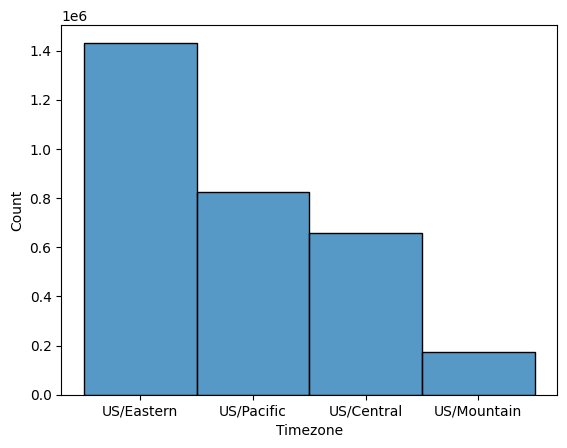

In [58]:
sns.histplot(data = df,x= 'Timezone',bins = 6)
plt.show()

### Insights

- **US/Eastern** timezone has 1432300 road accident cases almost half of the total data.
- **US/Mountain** has least number of road accident cases reported which is 172496 (5%).

## Street

In [59]:
street_accidents = df.Street.value_counts()

In [60]:
only_one = street_accidents[street_accidents == 1]

In [61]:
below_100 = street_accidents[street_accidents < 100]

In [62]:
above_100 = street_accidents[street_accidents >100]

In [63]:
above_1000 = street_accidents[street_accidents >1000]

In [64]:
above_5000 = street_accidents[street_accidents >5000]

In [65]:
above_5000.shape

(49,)

### Insights

- 227923 Streets have reported road accident cases
 - Street **I-95 N** has most road accident cases reported which is 31338 almost 1% of the total data.
 - 105049(46%) Streets have only 1 accident reported which is 46% of the total data.
 - 223960(98.2%) Streets have below 100 accident reported
 - Only 3911(0.17%) Streets have above 100 road accident cases.
 - Only 304(0.013%) Streets have above 1000 road accident cases.
 - Only 49 Streets have above 5000 accidents cases.

In [66]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Week', 'Hour', 'Minute'],
      dtype='object')

## Road Condition Analysis

In [67]:
df['Bump'].value_counts()

Bump
False    3091546
True        1375
Name: count, dtype: int64

In [68]:
df['Crossing'].value_counts()

Crossing
False    2743252
True      349669
Name: count, dtype: int64

In [69]:
df['Junction'].value_counts()

Junction
False    2864381
True      228540
Name: count, dtype: int64

In [70]:
df['No_Exit'].value_counts()

No_Exit
False    3085178
True        7743
Name: count, dtype: int64

In [71]:
df['Traffic_Signal'].value_counts()

Traffic_Signal
False    2635355
True      457566
Name: count, dtype: int64

In [72]:
df['Turning_Loop'].value_counts()

Turning_Loop
False    3092921
Name: count, dtype: int64

In [73]:
df['Stop'].value_counts()

Stop
False    3007214
True       85707
Name: count, dtype: int64

### Insights

- Most of the accident occured in the absense of **Bump** which is 3091546 almost 99.9%.
- 97% road accident cases where there are no **Stop Signal**.
- There are no accident cases recorded near the **Turning Lop**
- 457566(14.7%) accident cases recorded near the **Traffic Singal**
- 11% accident cases recorded near the **Crossing**



## Weather condition

In [74]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Week', 'Hour', 'Minute'],
      dtype='object')

In [75]:
df.Weather_Condition.value_counts().head(10)

Weather_Condition
Fair                1025121
Mostly Cloudy        406410
Cloudy               327425
Clear                323391
Partly Cloudy        279288
Overcast             153738
Light Rain           140855
Scattered Clouds      82056
Light Snow            51337
Fog                   39493
Name: count, dtype: int64

In [76]:
1997440/len(df)

0.6458102227635301

In [77]:
df['Precipitation(in)'].value_counts().head()

Precipitation(in)
0.00    1997440
0.01      60331
0.02      29635
0.03      19968
0.04      14922
Name: count, dtype: int64

### Insights

- Almost 33% the **Weather** was **Fair** and almost 13% the weather was **Mostly Cloudy**.
- Almost 65% accident cases recorded when the **Precipetation(in)** is 0.00
- Most of the cases the Temperature is 50F to 90F.

# All Insights

 - This is 40% sample data.
 - There are 46 columns and 3091738 rows `4 million`.
 - Some are object type and some are int and float and some are bolean.

Some columns have missing values.
 - most missing values is from End_Lat and End_Lng columns.
 - and most of the columns have not missing values.
 - End_Lat and End_Lng has 44% missing values of the data
 - Precipitation(in) and Wind_Chill(F) is over 25% missing values.
 - City is the most less missing values which is 0.003%.

'ID' is unique value which is not important for the data.
'End_Lat' and 'End_Lng' has most of the missing data which is not important for the data.

- Severity 1 mean less impact on the traffic and 4 mean lot of the imfact with the trafic.


 - Severity 2 has about 2464141 values in the data which is 80%. (which give insight that traffic is not longer delay or accident in not demage the person.)
 - Severity1 is most less values of 26897 which is 0.8% of the data

 Source1 has most values in the datafram which is 1731629 value counts which is 55% of the data

 - this give insight that traffic accident machine occured on 2016.
 - the first accident were report on 2016 on the january month.
 - data is given from 2016 

 - Most of the accident occured in the 2022 which is 704618(22.7%) of the total data(1930 accident per day).
 - less accident are occured in the 2023 because accident report is only march of the 2023.
 - In 2022 the most accident occure the technology become advance every accident maybe reported. 


 - In ``Jan`` and ``Dec`` most accident are reported(I think it is the winter season and accident maybe occured due to fog or snow.)
 - Less are occured in the July. Which is summer season.

 - More accident occured in the range of 7 to 9am beacause this is office or school open time.
 - And then range that accident are most occured are 4 to 6pm that is the office or school end time.

- There is change in the trend of accident year by year.
- In 2016 Most of the data is missing beacuse the technology of accident survay is not improved well.


 - In the weekend day accident is well distributed beacuse People are not going to the office or school.
 - In the busy day,the accident have range 7 to 9am and 4pm to 5pm.

There are 12580 cities which accident reports.

 - Miami city has most number of accident which is 74886 which is 2.4% of the data
 - Houstan city has second most accidental City which reports 68059 accidents in the past 7 years.
 - 19% accident reports are occured in the 15 cities (as per data)

 - there are 85(0.67%) cities which is above 5000 accidents out of 12580 cities.
 - there are 532(4.22%) cities which is above 1000 accidents out of 12800 cities.
 - there are 12067(96%) cities which is less than  1000 accidents out of 12800 cities.
 - there are 9517(75.6%) cities which is less than 100 accidents out of 12580 cities.
 - there are 1440(11.4%) cities which is only 1 accident record in the past 8 years.

 - There are 49 state of data record for us-accident report.
 - California has the most number of accident which is 698132 which is 22.5% of the total data.
 - Florida is the second most accident reports record which is 351944 which is 11% of the data.
 - 63% accidents data record from only 8 states of the usa out of 49.
 - South Dakota is the least number of accident which is only 115.
 - 16 states have less than 10000 accident out of 49 states.

- **US/Eastern** timezone has 1432300 road accident cases almost half of the total data.
- **US/Mountain** has least number of road accident cases reported which is 172496 (5%).

- 227923 Streets have reported road accident cases
 - Street **I-95 N** has most road accident cases reported which is 31338 almost 1% of the total data.
 - 105049(46%) Streets have only 1 accident reported which is 46% of the total data.
 - 223960(98.2%) Streets have below 100 accident reported
 - Only 3911(0.17%) Streets have above 100 road accident cases.
 - Only 304(0.013%) Streets have above 1000 road accident cases.
 - Only 49 Streets have above 5000 accidents cases.

- Most of the accident occured in the absense of **Bump** which is 3091546 almost 99.9%.
- 97% road accident cases where there are no **Stop Signal**.
- There are no accident cases recorded near the **Turning Lop**
- 457566(14.7%) accident cases recorded near the **Traffic Singal**
- 11% accident cases recorded near the **Crossing**

- Almost 33% the **Weather** was **Fair** and almost 13% the weather was **Mostly Cloudy**.
- Almost 65% accident cases recorded when the **Precipetation(in)** is 0.00
- Most of the cases the Temperature is 50F to 90F.